In [ ]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px

# 1. Cargar el archivo CSV
# Cambia 'archivo.csv' por el nombre de tu archivo
df = pd.read_csv("C:\\Users\\USUARIO\\Desktop\\prueba tecnica\\data_customers.csv")


# 2. Análisis Exploratorio de Datos (EDA)
print("Primeras filas del conjunto de datos:")
print(df.head())


Primeras filas del conjunto de datos:
     fullVisitorId channelGrouping  weekend_prop  hour  sessionId  \
0  213131142648941          Direct      0.000000  22.0          1   
1  435324061339869        Referral      0.666667  21.0          3   
2  562678147042735  Organic Search      0.000000  14.0          2   
3  585708896049892        Referral      0.000000  20.0          1   
4  670722016498267        Referral      0.000000  17.0          2   

  device.browser device.deviceCategory  device.isMobile  \
0         Chrome               desktop              0.0   
1         Chrome               desktop              0.0   
2         Chrome               desktop              0.0   
3         Chrome               desktop              0.0   
4         Chrome               desktop              0.0   

  device.operatingSystem  totals.hits  totals.pageviews  bounce_prop  \
0              Macintosh         14.0              13.0          0.0   
1              Macintosh         14.0           

In [15]:
# Ver el tipo de datos de cada columna
print(df.dtypes)


fullVisitorId              uint64
channelGrouping            object
weekend_prop              float64
hour                      float64
sessionId                   int64
device.browser             object
device.deviceCategory      object
device.isMobile           float64
device.operatingSystem     object
totals.hits               float64
totals.pageviews          float64
bounce_prop               float64
trafficSource.medium       object
dtype: object


1. ANALISIS EXPLORATORIO DE DATOS (EDA):

No se encuentran datos nulos , pero lo que si se encuentran es que los datos numericos muchos outlayers lo que sera necesario una normalizacion 

In [16]:
print("\nResumen de estadísticas:")
print(df.describe())
print("\nInformación de los datos:")
print(df.info())
# Contar la cantidad de datos nulos en cada columna
null_counts = df.isnull().sum()
print(null_counts)



Resumen de estadísticas:
       fullVisitorId  weekend_prop         hour    sessionId  device.isMobile  \
count   9.996000e+03   9996.000000  9996.000000  9996.000000      9996.000000   
mean    4.478856e+18      0.147011    14.449030     3.606443         0.096870   
std     3.066153e+18      0.296219     6.261204     6.074226         0.295655   
min     2.131311e+14      0.000000     0.000000     1.000000         0.000000   
25%     1.577139e+18      0.000000    11.000000     1.000000         0.000000   
50%     4.346933e+18      0.000000    16.500000     2.000000         0.000000   
75%     7.132082e+18      0.126359    19.000000     4.000000         0.000000   
max     9.998996e+18      1.000000    23.000000   278.000000         1.000000   

       totals.hits  totals.pageviews  bounce_prop  
count  9996.000000       9996.000000  9996.000000  
mean     22.177771         17.530312     0.082718  
std      21.916773         16.259149     0.162298  
min       1.000000          1.000000

In [20]:
# Contar la cantidad de datos nulos en cada columna
null_counts = df.isnull().sum()
print(null_counts)

fullVisitorId             0
channelGrouping           0
weekend_prop              0
hour                      0
sessionId                 0
device.browser            0
device.deviceCategory     0
device.isMobile           0
device.operatingSystem    0
totals.hits               0
totals.pageviews          0
bounce_prop               0
trafficSource.medium      0
dtype: int64


In [ ]:
* Grafica de histogramas y boxplot para apreciar la distribucion de los datos numericos

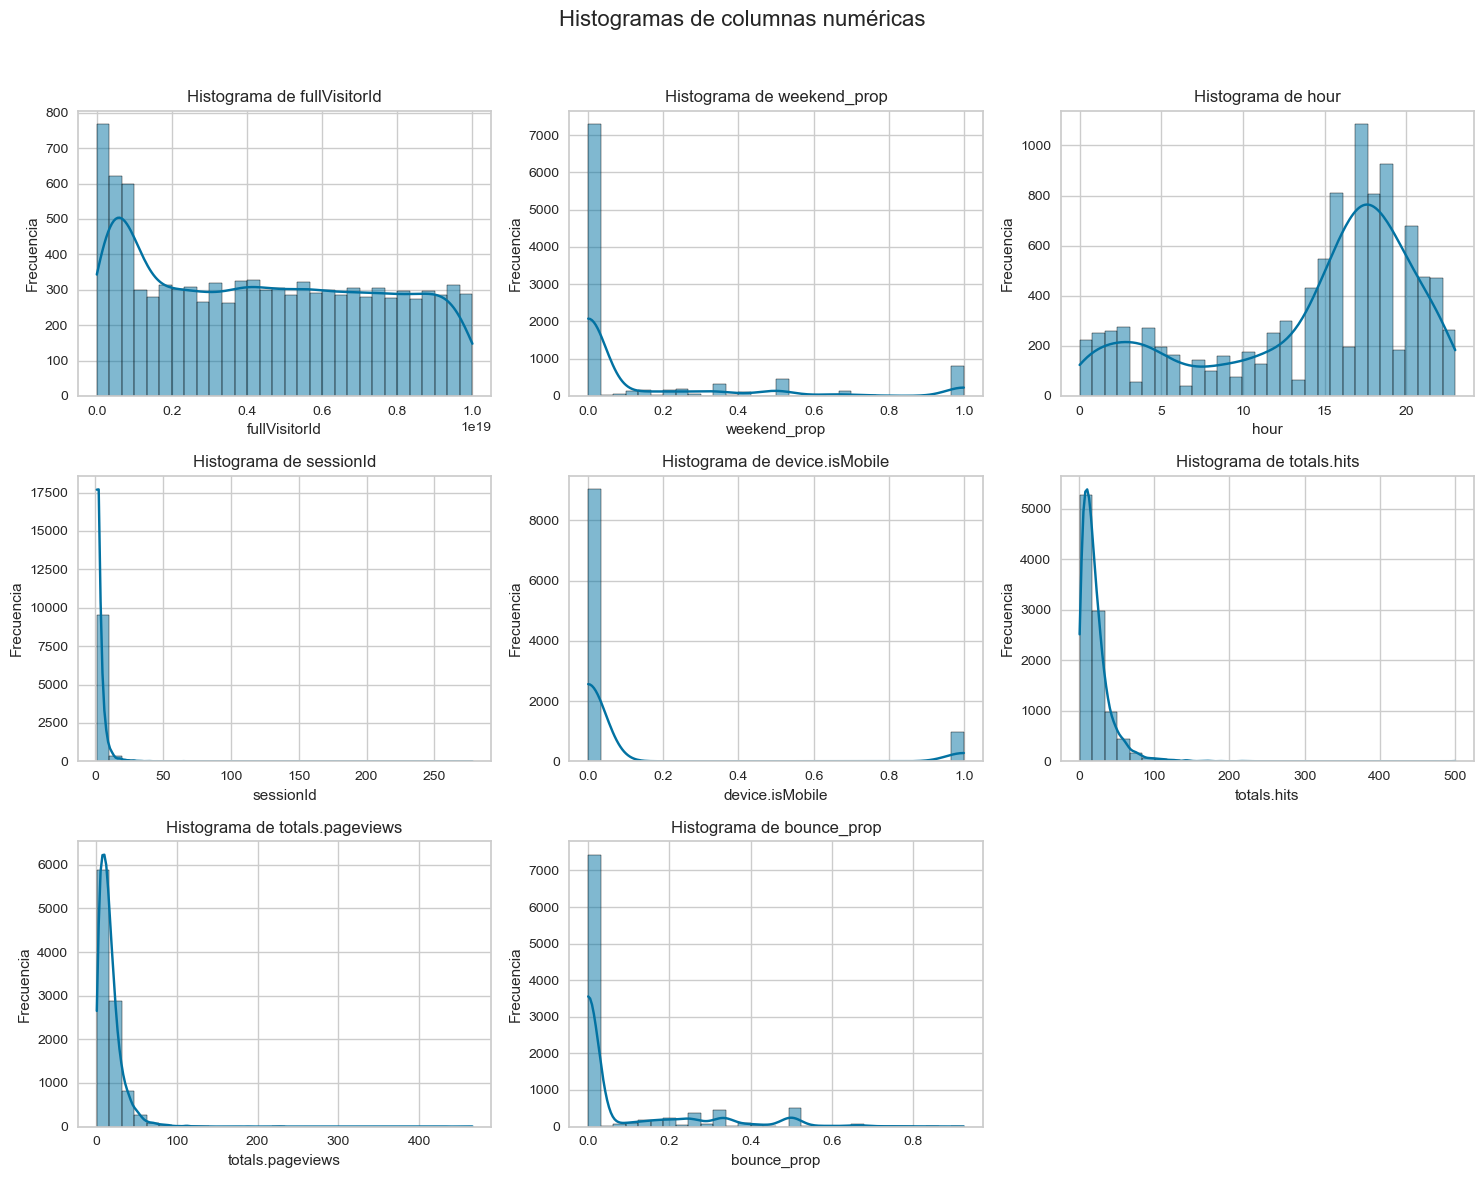

In [10]:
# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include='number').columns

# Crear una cuadrícula para mostrar los histogramas
num_cols = 3  # Número de columnas en la cuadrícula
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols  # Calcular filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
fig.suptitle("Histogramas de columnas numéricas", fontsize=16)
axes = axes.flatten()  # Aplanar la cuadrícula para iterar fácilmente

# Graficar cada histograma
for i, column in enumerate(numeric_columns):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

# Eliminar los ejes vacíos en caso de que existan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuste para evitar superposiciones
plt.show()

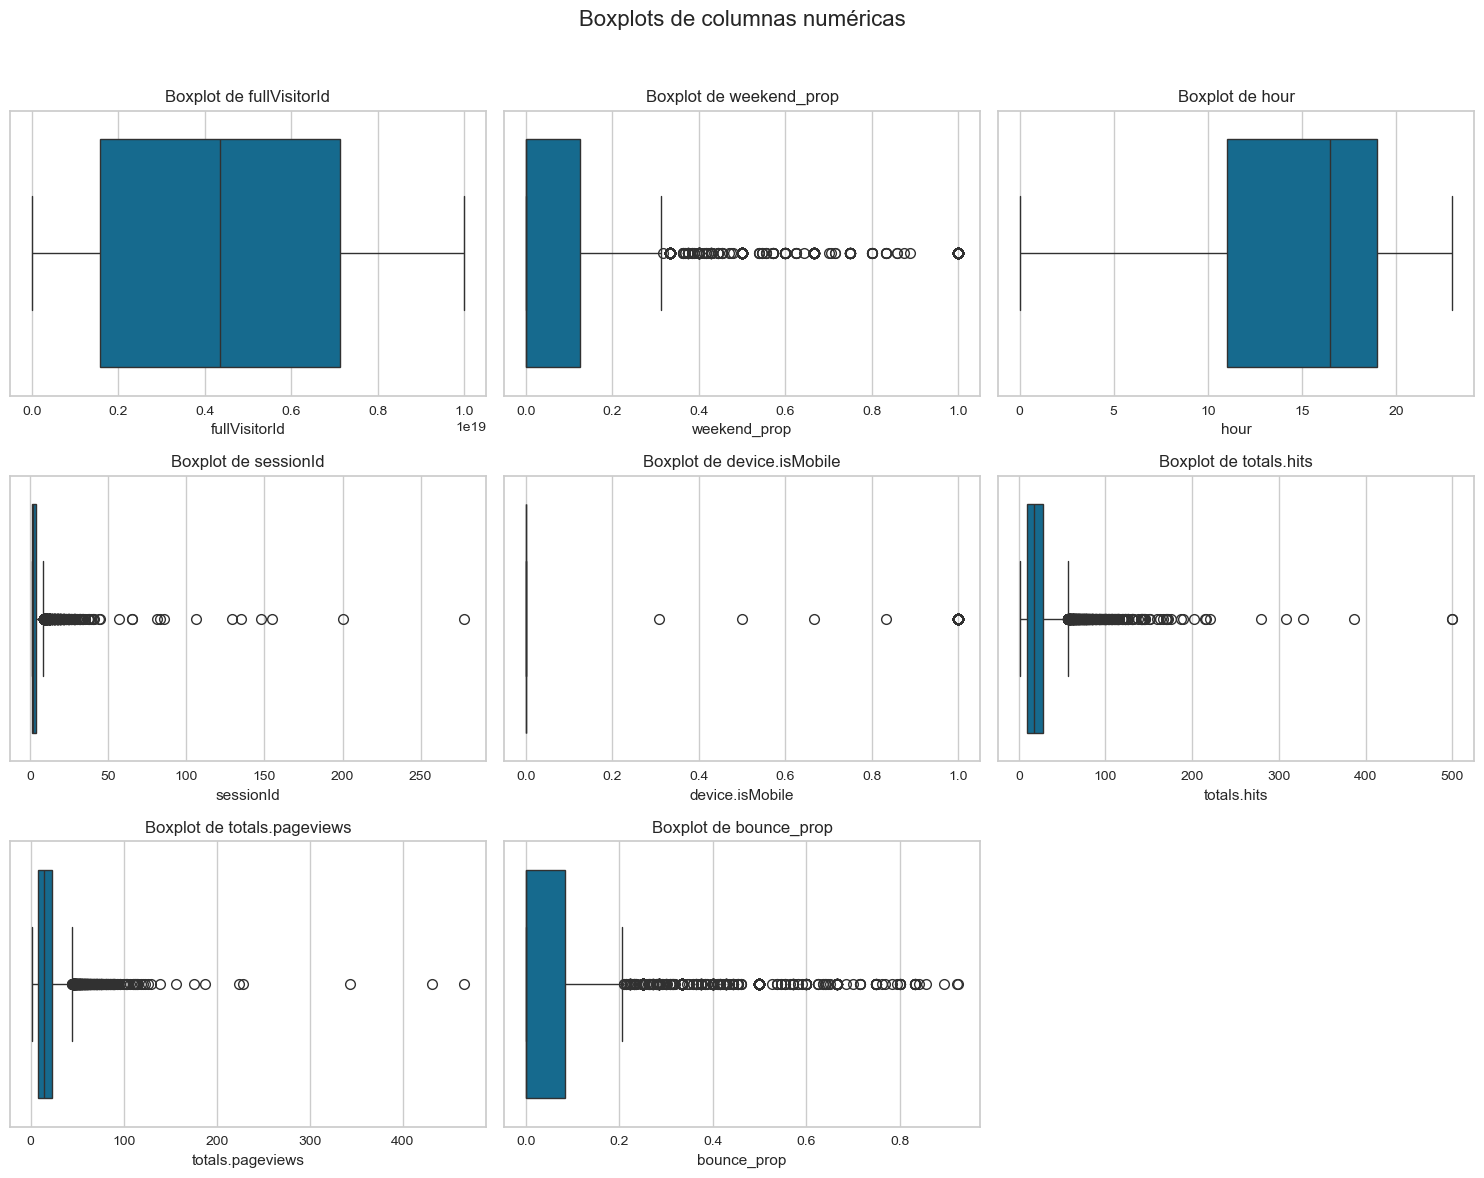

In [11]:
# Seleccionar solo columnas numéricas
numeric_columns = df.select_dtypes(include='number').columns

# Crear una cuadrícula para mostrar los boxplots
num_cols = 3  # Número de columnas en la cuadrícula
num_rows = (len(numeric_columns) + num_cols - 1) // num_cols  # Calcular filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
fig.suptitle("Boxplots de columnas numéricas", fontsize=16)
axes = axes.flatten()  # Aplanar la cuadrícula para iterar fácilmente

# Graficar cada boxplot
for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Boxplot de {column}')
    axes[i].set_xlabel(column)

# Eliminar los ejes vacíos en caso de que existan
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Ajuste para evitar superposiciones
plt.show()

segun la grafica de relacion existe mucha relacion entre tatals.hits y total.pagevielws (para mas detalle segun el mapa de calor los valores cercanos a 1 tiene una relacion directa osea si una sube la otra variable tambien esta relacionada sube , pero si es mas cercanana a -0.3 es inverso osea si una varibale sube la otra baja)

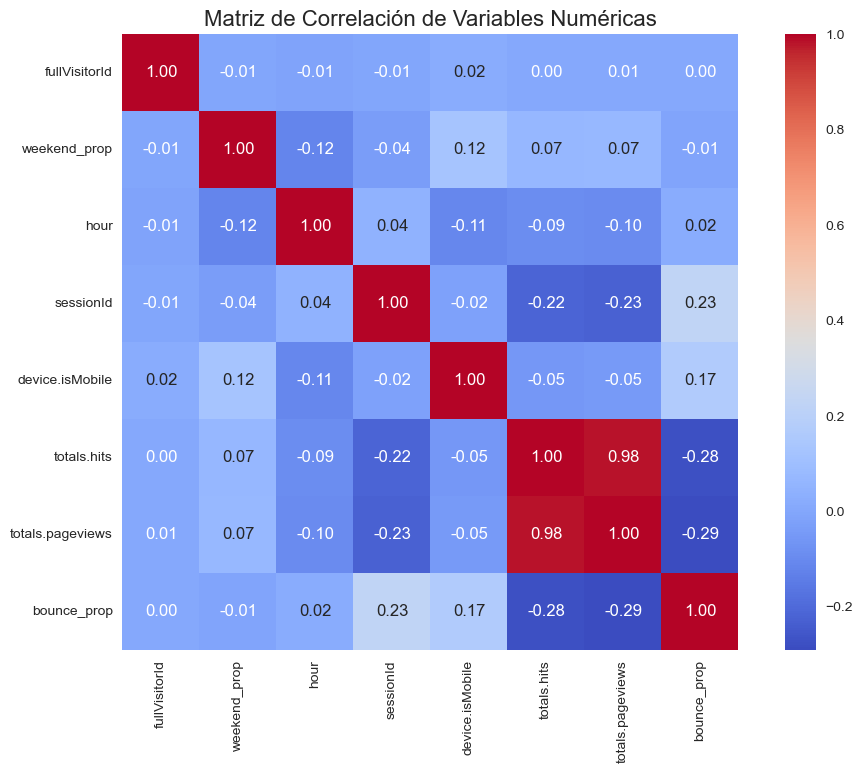

In [14]:
# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo con las columnas numéricas
corr_matrix = numeric_df.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title("Matriz de Correlación de Variables Numéricas", fontsize=16)
plt.show()


2. Preprocesamiento de Datos:


In [21]:
from sklearn.preprocessing import MinMaxScaler

# Suponiendo que tu DataFrame se llama 'df'
# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear un objeto MinMaxScaler
scaler = MinMaxScaler()

# Aplicar la normalización a las columnas numéricas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Mostrar las primeras filas para verificar
print(df.head())

     fullVisitorId channelGrouping  weekend_prop      hour  sessionId  \
0  213131142648941          Direct      0.000000  0.956522    0.00000   
1  435324061339869        Referral      0.666667  0.913043    0.00722   
2  562678147042735  Organic Search      0.000000  0.608696    0.00361   
3  585708896049892        Referral      0.000000  0.869565    0.00000   
4  670722016498267        Referral      0.000000  0.739130    0.00361   

  device.browser device.deviceCategory  device.isMobile  \
0         Chrome               desktop              0.0   
1         Chrome               desktop              0.0   
2         Chrome               desktop              0.0   
3         Chrome               desktop              0.0   
4         Chrome               desktop              0.0   

  device.operatingSystem  totals.hits  totals.pageviews  bounce_prop  \
0              Macintosh     0.026052          0.025806          0.0   
1              Macintosh     0.026052          0.021505       

* Se hace un vista en histograma de las variables categoricas para descrubrir algunas fallas (se aprecia que en )

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_41072\2012836240.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_41072\2012836240.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_41072\2012836240.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette="viridis")
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_41072\2012836240.py:9: FutureWarning

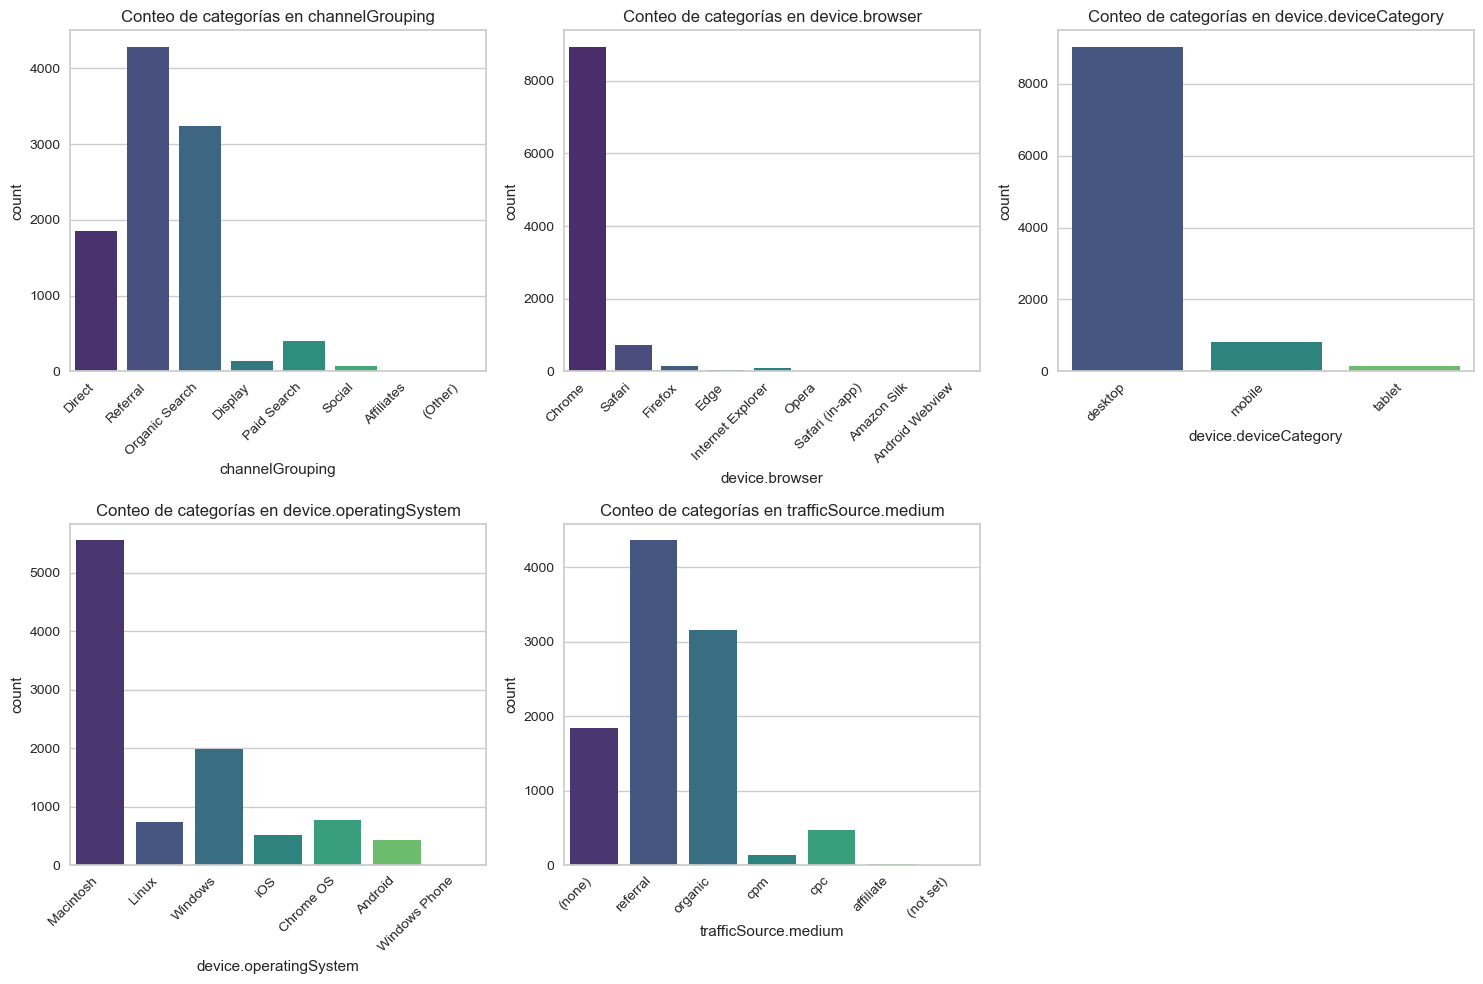

In [ ]:
# Listar las columnas que deseas analizar analizado las variables categoricas 

columns_to_plot = ['channelGrouping', 'device.browser', 'device.deviceCategory', 'device.operatingSystem', 'trafficSource.medium']

# Crear un gráfico de barras para cada columna
plt.figure(figsize=(15, 10))  # Ajustar el tamaño de la figura

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Crear subgráficos en una cuadrícula 2x3
    sns.countplot(data=df, x=column, palette="viridis")
    plt.title(f"Conteo de categorías en {column}")
    plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x si es necesario
    plt.tight_layout()  # Ajustar el layout para evitar superposiciones

plt.show()

2. Preprocesamiento de Datos:

2.1 Normalizacion y asignacion de variables categoricas :
En la columna trafficsource.medium existe el valor none como data y not set como dato por ellos solo se le dara un valor numero a esa varibale cagorica por que representa una categoria sin asignar 

In [33]:
# Especificar las columnas que quieres normalizar
columns_to_normalize = ['weekend_prop', 'sessionId', 'device.isMobile', 'totals.hits', 'totals.pageviews', 'bounce_prop']

# Inicializar el scaler
scaler = MinMaxScaler()

# Aplicar la normalización solo a las columnas seleccionadas
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Ahora los valores de las columnas seleccionadas estarán en el rango [0, 1]

In [34]:
# Definir las columnas categóricas a codificar
categorical_columns = ['channelGrouping', 'device.browser', 'device.deviceCategory', 'device.operatingSystem', 'trafficSource.medium']

# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicar la codificación a cada columna categórica
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [37]:
print(df.head(5))

     fullVisitorId  channelGrouping  weekend_prop      hour  sessionId  \
0  213131142648941                2      0.000000  0.956522    0.00000   
1  435324061339869                6      0.666667  0.913043    0.00722   
2  562678147042735                4      0.000000  0.608696    0.00361   
3  585708896049892                6      0.000000  0.869565    0.00000   
4  670722016498267                6      0.000000  0.739130    0.00361   

   device.browser  device.deviceCategory  device.isMobile  \
0               2                      0              0.0   
1               2                      0              0.0   
2               2                      0              0.0   
3               2                      0              0.0   
4               2                      0              0.0   

   device.operatingSystem  totals.hits  totals.pageviews  bounce_prop  \
0                       3     0.026052          0.025806          0.0   
1                       3     0.026052    

In [ ]:
3. Segmentación de Clientes:

Se procede a separa los clientes y hacer una anilisis vasandonos en los cuadros de calor y histogramas .

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_41072\746041875.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering[['weekend_prop', 'sessionId', 'totals.hits', 'totals.pageviews', 'bounce_prop']] = scaler.fit_transform(


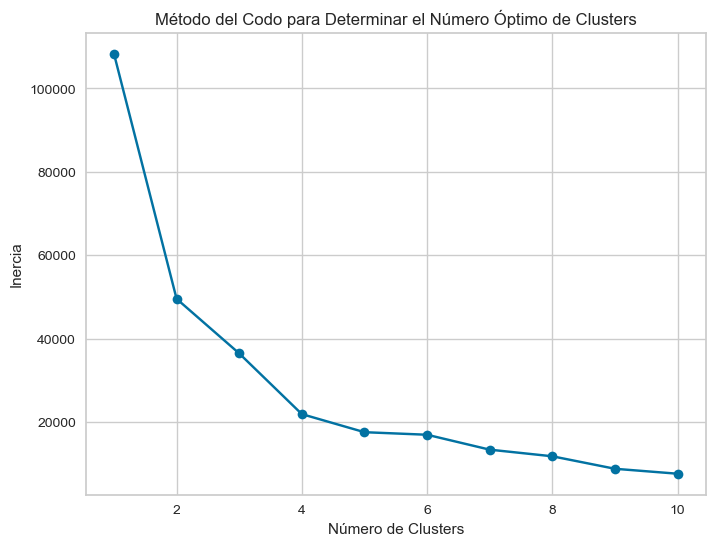

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_41072\746041875.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clustering['Cluster'] = kmeans.fit_predict(df_clustering)


Silhouette Score: 0.63
         fullVisitorId  channelGrouping  weekend_prop      hour  sessionId  \
Cluster                                                                      
0         4.518775e+18         4.063376      0.183787  0.597985   0.009079   
1         4.542822e+18         1.993178      0.127768  0.655844   0.009326   
2         4.436128e+18         6.014282      0.109203  0.654007   0.010078   
3         4.409572e+18         3.871693      0.256134  0.541437   0.007139   

         device.browser  device.deviceCategory  device.isMobile  \
Cluster                                                           
0              2.082484               0.131210         0.118357   
1              2.249005               0.094372         0.083949   
2              2.003916               0.003916         0.003225   
3              6.846561               0.706349         0.575397   

         device.operatingSystem  totals.hits  totals.pageviews  bounce_prop  \
Cluster                   

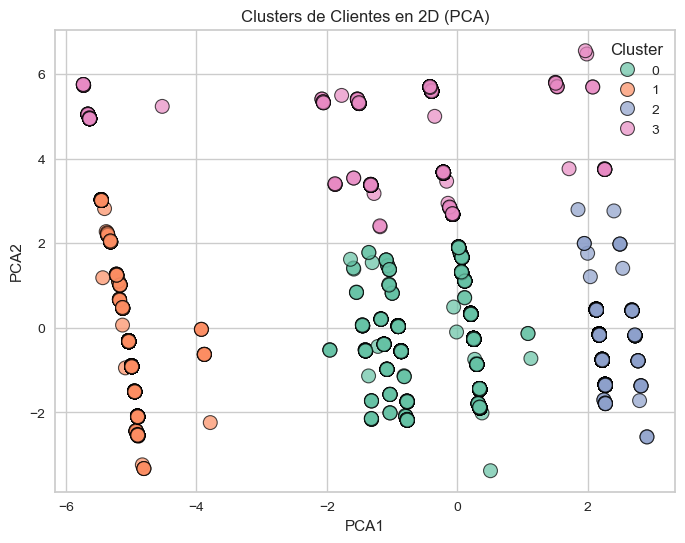

In [ ]:

# 1. Preprocesamiento de datos

# Selección de las columnas relevantes para el clustering
columns_for_clustering = [
    'weekend_prop', 'sessionId', 'device.isMobile', 'totals.hits', 
    'totals.pageviews', 'bounce_prop', 'channelGrouping', 
    'device.browser', 'device.deviceCategory', 'device.operatingSystem', 
    'trafficSource.medium'
]

# Asegúrate de que 'df' es tu DataFrame
df_clustering = df[columns_for_clustering]

# Normalizar las columnas numéricas
scaler = MinMaxScaler()
df_clustering[['weekend_prop', 'sessionId', 'totals.hits', 'totals.pageviews', 'bounce_prop']] = scaler.fit_transform(
    df_clustering[['weekend_prop', 'sessionId', 'totals.hits', 'totals.pageviews', 'bounce_prop']]
)

# 2. Realización del Clustering (KMeans)
# Determinar el número óptimo de clusters usando el método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clustering)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.show()

# Según el gráfico, elegir el número de clusters
# Supongamos que elegimos 4 clusters (esto depende del gráfico del codo)

kmeans = KMeans(n_clusters=4, random_state=42)
df_clustering['Cluster'] = kmeans.fit_predict(df_clustering)

# 3. Evaluación del modelo con Silhouette Score
silhouette_avg = silhouette_score(df_clustering, df_clustering['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# 4. Análisis de los clusters obtenidos
# Agregar los resultados de los clusters a la DataFrame original
df['Cluster'] = df_clustering['Cluster']

# Ver estadísticas descriptivas por cluster
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# 5. Visualización de los clusters
# Graficar los clusters en un espacio reducido (usaremos PCA para reducción de dimensiones)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_clustering.drop('Cluster', axis=1))

# Crear un DataFrame con los componentes principales y los clusters
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df_clustering['Cluster']

# Graficar los clusters en 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100, alpha=0.7, edgecolor='black')
plt.title('Clusters de Clientes en 2D (PCA)')
plt.show()

# 6. Conclusiones
# Dependiendo de los resultados del clustering, podrías concluir sobre las características de cada grupo.
# Ejemplo:
# - Cluster 0 Representar a clientes con mayor interacción en el sitio (altos valores en hits, pageviews).
# - Cluster 1 Tiene clientes que visitan los fines de semana, con baja interacción en la página.
# - Cluster 2 tiene clientes con una alta tasa de rebote (bounce_prop), indicando desinterés por el contenido.
# - Cluster 3 representa usuarios más comprometidos con el sitio, pero que no visitan frecuentemente.



4. Análisis e Interpretación de Resultados:

4.1 Primeramente los resultados es ubicar cada cliente y separarlo en cluster (clases) , segun el analisis se encontraron 4 clases muy resaltantes 

4.2 En el siguiente codigo se separada cada cliente por su visitorids 

In [41]:
# Separar los datos por cada cluster y guardar en DataFrames distintos

# Crear un DataFrame para cada cluster, usando la columna 'Cluster' como filtro
df_cluster_0 = df[df['Cluster'] == 0]
df_cluster_1 = df[df['Cluster'] == 1]
df_cluster_2 = df[df['Cluster'] == 2]
df_cluster_3 = df[df['Cluster'] == 3]

# Si solo deseas ver los 'fullVisitorId' de cada cluster, puedes extraer esta columna
visitor_ids_cluster_0 = df_cluster_0['fullVisitorId']
visitor_ids_cluster_1 = df_cluster_1['fullVisitorId']
visitor_ids_cluster_2 = df_cluster_2['fullVisitorId']
visitor_ids_cluster_3 = df_cluster_3['fullVisitorId']

# Opcional: imprimir los DataFrames para confirmar
print(f"Clientes en el Cluster 0: {visitor_ids_cluster_0.head()}")
print(f"Clientes en el Cluster 1: {visitor_ids_cluster_1.head()}")
print(f"Clientes en el Cluster 2: {visitor_ids_cluster_2.head()}")
print(f"Clientes en el Cluster 3: {visitor_ids_cluster_3.head()}")

Clientes en el Cluster 0: 2      562678147042735
7     1905118576359487
14    3450834640354121
16    3961110741104601
18    4868452367846670
Name: fullVisitorId, dtype: uint64
Clientes en el Cluster 1: 0      213131142648941
5      852801263780322
6     1123528056036404
9     2709834583138581
12    3038010493412298
Name: fullVisitorId, dtype: uint64
Clientes en el Cluster 2: 1      435324061339869
3      585708896049892
4      670722016498267
11    2871498069867123
17    4638983005167591
Name: fullVisitorId, dtype: uint64
Clientes en el Cluster 3: 8      2527528149176601
10     2838359588704338
15     3717831825503026
28     7617910709180468
54    18386080117189534
Name: fullVisitorId, dtype: uint64


4.2 : clonclusiones de cada cliente 



# - Cluster 0 Representar a clientes con mayor interacción en el sitio (altos valores en hits, pageviews).
# - Cluster 1 Tiene clientes que visitan los fines de semana, con baja interacción en la página.
# - Cluster 2 tiene clientes con una alta tasa de rebote (bounce_prop), indicando desinterés por el contenido.
# - Cluster 3 representa usuarios más comprometidos con el sitio, pero que no visitan frecuentemente.


CAMPAÑAS DE MARQUETING PARA CADA CLUSTER (CLASE DE CLIENTE SEGUN SU FORMA)

In [ ]:
# Estrategias de Marketing por Segmento de Clientes

## Cluster 0: Usuarios de Alta Interacción

### Perfil
- Alto número de hits y pageviews
- Usuarios altamente comprometidos
- Exploran múltiples secciones del sitio

### Estrategias
1. Programa de Fidelización
   - Implementar un sistema de puntos por interacción
   - Ofrecer beneficios exclusivos por nivel de engagement
   - Crear un club VIP con acceso anticipado a nuevos productos/contenidos

2. Marketing de Contenido Premium
   - Desarrollar contenido exclusivo y especializado
   - Crear webinars y eventos especiales
   - Ofrecer guías detalladas y recursos descargables

3. Cross-selling y Upselling
   - Recomendar productos/servicios complementarios
   - Ofrecer paquetes premium personalizados
   - Implementar un sistema de recomendaciones basado en su historial

4. Estrategia de Embajadores
   - Invitarlos a programas de referidos
   - Crear comunidades exclusivas
   - Solicitar testimonios y casos de éxito

## Cluster 1: Visitantes de Fin de Semana

### Perfil
- Visitas concentradas en fines de semana
- Baja interacción general
- Posiblemente usuarios en busca de entretenimiento/ocio

### Estrategias
1. Marketing Temporal
   - Crear ofertas especiales para fines de semana
   - Implementar newsletters de "Planes de fin de semana"
   - Desarrollar contenido específico para tiempo libre

2. Campañas Mobile-First
   - Optimizar la experiencia móvil
   - Crear contenido consumible en momentos de ocio
   - Implementar notificaciones push para weekends

3. Gamificación
   - Desarrollar concursos de fin de semana
   - Crear retos semanales con premios
   - Implementar sistemas de logros por participación

4. Social Media Marketing
   - Aumentar la presencia en redes sociales durante fines de semana
   - Crear hashtags específicos para el fin de semana
   - Desarrollar contenido compartible

## Cluster 2: Usuarios con Alta Tasa de Rebote

### Perfil
- Alto bounce rate
- Bajo tiempo de permanencia
- Posible desajuste entre expectativas y contenido

### Estrategias
1. Optimización de Landing Pages
   - Mejorar el diseño y usabilidad
   - Crear páginas específicas por fuente de tráfico
   - Implementar A/B testing continuo

2. Retargeting Personalizado
   - Crear campañas específicas por intención de búsqueda
   - Desarrollar anuncios con propuestas de valor claras
   - Implementar secuencias de remarketing progresivo

3. Mejora de Primera Impresión
   - Optimizar tiempos de carga
   - Crear contenido más visual y atractivo
   - Implementar CTAs claros y relevantes

4. Content Marketing Específico
   - Desarrollar contenido más conciso y directo
   - Crear guías rápidas y resúmenes
   - Implementar videos explicativos cortos

## Cluster 3: Usuarios Comprometidos pero Poco Frecuentes

### Perfil
- Alto engagement durante visitas
- Baja frecuencia de visitas
- Posiblemente usuarios con necesidades específicas

### Estrategias
1. Email Marketing Personalizado
   - Crear newsletters con resúmenes periódicos
   - Desarrollar campañas de reactivación
   - Implementar sistemas de alertas personalizadas

2. Estrategia de Valor Añadido
   - Crear contenido especializado por nicho
   - Desarrollar herramientas útiles para su sector
   - Implementar servicios de consultoría personalizada

3. Marketing de Recordatorio
   - Implementar sistemas de recordatorios personalizados
   - Crear calendarios de contenido relevante
   - Desarrollar campañas de "¿Sabías que...?"

4. Programa de Incentivos
   - Ofrecer descuentos por visitas recurrentes
   - Crear beneficios por suscripción
   - Implementar sistemas de reserva o compra anticipada

## Métricas de Seguimiento Recomendadas

1. KPIs Generales
   - Tasa de conversión por cluster
   - Tiempo de permanencia
   - Valor del cliente a largo plazo (CLV)

2. KPIs Específicos por Cluster
   - Cluster 0: Tasa de participación en programa VIP
   - Cluster 1: Engagement en fin de semana
   - Cluster 2: Reducción del bounce rate
   - Cluster 3: Incremento en frecuencia de visitas